In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('hall.csv')

In [3]:
df.head()

,id,time,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,freq_low,freq_moderate,freq_severe,glucotype,Height,Weight,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG
0,1636-69-001,2014-02-03 03:42:12,93.0,59.0,21.7,6.7,109.0,205.0,9.0,0.3,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
1,1636-69-001,2014-02-03 03:47:12,93.0,59.0,21.7,6.7,109.0,205.0,9.0,0.3,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
2,1636-69-001,2014-02-03 03:52:12,93.0,59.0,21.7,6.7,109.0,205.0,9.0,0.3,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
3,1636-69-001,2014-02-03 03:57:12,95.0,59.0,21.7,6.7,109.0,205.0,9.0,0.3,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
4,1636-69-001,2014-02-03 04:02:12,96.0,59.0,21.7,6.7,109.0,205.0,9.0,0.3,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0


In [ ]:
df['time']=pd.to_datetime(df['time'])
df['date']=df['time'].dt.date
df['clock_time']=df['time'].dt.time

cols=['id''time','date','clock_time']+[col for col in df.columns if col not in ['id','time', 'date','clock_time']]
df=df[cols]

df.head()

,id,time,date,clock_time,id,gl,Age,BMI,A1C,FBG,...,freq_low,freq_moderate,freq_severe,glucotype,Height,Weight,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG
0,1636-69-001,2014-02-03 03:42:12,2014-02-03,03:42:12,1636-69-001,93.0,59.0,21.7,6.7,109.0,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
1,1636-69-001,2014-02-03 03:47:12,2014-02-03,03:47:12,1636-69-001,93.0,59.0,21.7,6.7,109.0,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
2,1636-69-001,2014-02-03 03:52:12,2014-02-03,03:52:12,1636-69-001,93.0,59.0,21.7,6.7,109.0,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
3,1636-69-001,2014-02-03 03:57:12,2014-02-03,03:57:12,1636-69-001,95.0,59.0,21.7,6.7,109.0,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0
4,1636-69-001,2014-02-03 04:02:12,2014-02-03,04:02:12,1636-69-001,96.0,59.0,21.7,6.7,109.0,...,0.147059,0.369748,0.483193,2,176.3,68.0,0.1015,0.190404,0.026211,91.0


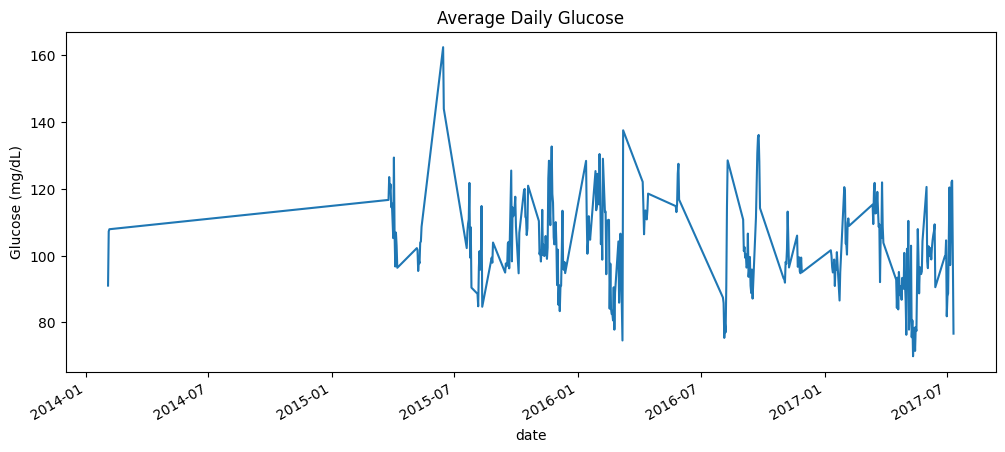

In [ ]:
daily_glucose=df.groupby('date')['gl'].mean()
daily_glucose.index=pd.to_datetime(daily_glucose.index)

daily_glucose.plot(figsize=(12,5),title='Average Daily Glucose')
plt.ylabel("Glucose (mg/dL)")
plt.show()

/Users/tucker/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tucker/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tucker/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tucker/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

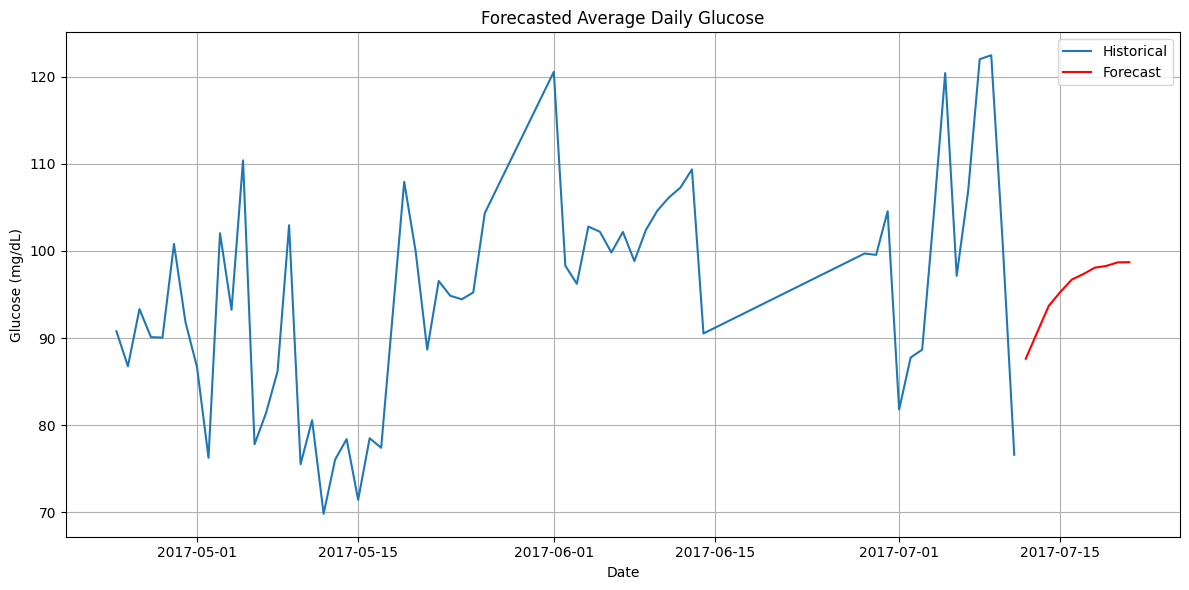

In [ ]:
daily_glucose=df.groupby('date')['gl'].mean()
daily_glucose.index=pd.to_datetime(daily_glucose.index)

ts=daily_glucose.dropna()

model=ARIMA(ts,order=(3,1,2))
model_fit=model.fit()

forecast_steps=10
forecast = model_fit.forecast(steps=forecast_steps)

last_date=ts.index[-1]
forecast_index=pd.date_range(start=last_date+pd.Timedelta(days=1),periods=forecast_steps,freq='D')
forecast.index=forecast_index

plt.figure(figsize=(12,6))
plt.plot(ts[-60:],label='Historical')
plt.plot(forecast,label='Forecast',color='red')
plt.title("Forecasted Average Daily Glucose")
plt.xlabel("Date")
plt.ylabel("Glucose (mg/dL)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Í